# The Space of 3x3 Correlation Matrices

## Motivation
Given $n=2$ random variables, the space of correlation matrices $\mathscr{C}_2$ between them is simply given by
\begin{align*}
    \mathscr{C}_2
    =\Big\{
        \begin{pmatrix}
            1 & \rho \\
            \rho & 1
        \end{pmatrix}
        \in \mathbb{R}^{2 \times 2} \; \Big| \; \rho \in [-1,1]
    \Big\},
\end{align*}
which can simply be visualised as the interval $[-1,1] \subset \mathbb{R}$. 

In general, the space $\mathscr{C}_n$ of correlation matrices between $n$ random variables is given by all symmetric positive definite matrices $C \in \mathbb{R}^{n \times n}$ with entires in $[-1,1]$ and a unit diagonal, which is much harder to visualize.

But for $n=3$ this space has a neat parametrization as a subset of $\mathbb{R}^3$, which allows for some nice plots. In this notebook we show the visualization of the $3x3$ correlation matrices and give a proof of the parametrization.

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as wd
import plotly.graph_objects as go

# Parametrization
The visualizations below are based on the following

**Theorem:** The space $\mathscr{C}_3$ of correlation matrices between $n=3$ random variables is given by
\begin{align*}
   \mathscr{C}_3 = \Big\{ 
    \begin{pmatrix}
        1 & a & b \\
        a & 1 & c \\
        b & c & 1
    \end{pmatrix}
    \Big| a,b \in [-1,1], c \in [c_-(a,b), c_+(a,b)] \Big\}, 
\end{align*}
where
\begin{align*}
    c_{\pm}(a,b) := ab \pm \sqrt{(1-b^2)(1-a^2)}.
\end{align*}
A proof is given in the appendix below.

In [5]:
n = 50
a = np.linspace(-1, 1, n)
b = np.linspace(-1, 1, n)
a_, b_= np.meshgrid(a, b)
c_p = np.array([[aa * bb + np.sqrt( (1 - bb **2) * (1 - aa **2) ) for aa in a] for bb in b ])
c_m = np.array([[aa * bb - np.sqrt( (1 - bb **2) * (1 - aa **2) ) for aa in a] for bb in b ])

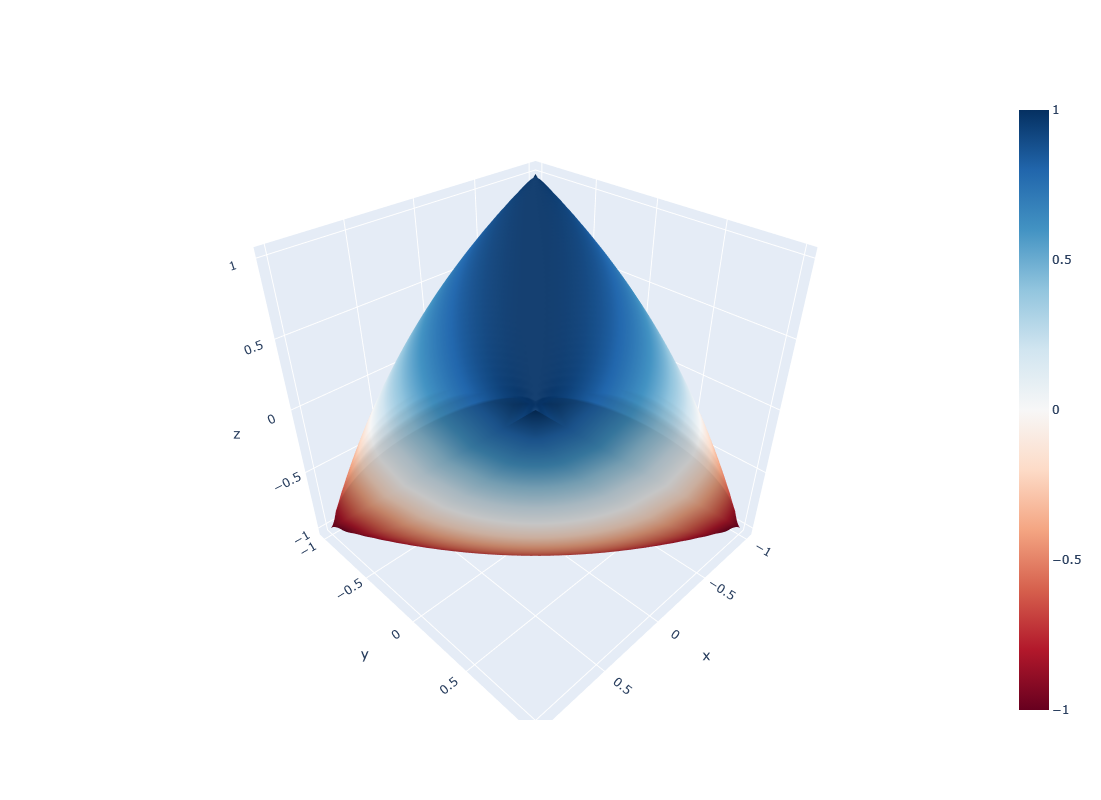

In [6]:
fig = go.Figure(data=[go.Surface(x=a,y=b,z=c_p, colorscale="RdBu"),
                     go.Surface(x=a,y=b,z=c_m, colorscale="RdBu")])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

## Appendix A: Proof of Theorem

By definition a matrix $C \in \mathbb{R}^{n \times n}$ is a correlation matrix if any only if
1. $C$ has a unit diagonal
2. $C$ is symmetric
3. all entries of $C$ are in $[-1,1]$
4. $C$ is positive semi-definite

Notice that conditions 1.-3.) are satisfied if and only if $C$ is of the form 
\begin{align*}
C = \begin{pmatrix}
        1 & a & b \\
        a & 1 & c \\
        b & c & 1
    \end{pmatrix}
\end{align*}
for some $a,b,c \in [-1,1]$. By Sylvester's criterion, condition 4. is satisfied if and only if all principal minors of $C$ have non-negative determinant, i.e. if and only if
\begin{align*}
    \begin{vmatrix}
        1 & a\\
        a & 1
    \end{vmatrix} \geq 0, && \text{ and } &&
    \begin{vmatrix}
        1 & a & b \\
        a & 1 & c \\
        b & c & 1
    \end{vmatrix} \geq 0.
\end{align*}
Notice that the first condition satisfies
\begin{align*}
    0 \leq
    \begin{vmatrix}
        1 & a\\
        a & 1
    \end{vmatrix}
    = 1 - a^2 
    \Longleftrightarrow
    a^2 \leq 1
    \Longleftrightarrow
    a \in [-1,1],
\end{align*}
and is hence already satisfied due to condition 3. The crucial part is hence to check condition 4. Expanding through the first colum, we calculate this determinant via

\begin{align*}
    \begin{vmatrix}
        1 & a & b \\
        a & 1 & c \\
        b & c & 1
    \end{vmatrix}
    &=(-1)^{1+1} 
    \begin{vmatrix}
        1 & c \\
        c & 1
    \end{vmatrix}
    +a (-1)^{1+2}
    \begin{vmatrix}
        a & b \\
        c & 1
    \end{vmatrix}
    +b (-1)^{1+3}
    \begin{vmatrix}
        a & b \\
        1 & c
    \end{vmatrix} \\
    &=1 - c^2 -a(a - bc) + b (ac-b) \\
    &=1 - c^2 -a^2 + abc + abc-b^2 \\
    &=1 -a^2 - b^2 - c^2  + 2abc
\end{align*}

The zeroes of this equation are characterized by
\begin{align*}
    1 -a^2 - b^2 - c^2  + 2abc = 0
    &\Longleftrightarrow c^2  - 2abc = 1 - a^2 - b^2 \\
    &\Longleftrightarrow c^2  - 2abc + (ab)^2 = 1 - a^2 - b^2 + (ab)^2 \\
    &\Longleftrightarrow (c-ab)^2 = 1- b^2 - a^2(1-b^2) = (1-b^2)(1-a^2) =: \Delta(a,b).
\end{align*}
Notice that for any $a,b \in [-1,1]$, we have $\Delta(a,b) \geq 0$ and hence this equation has only real solutions, namely
\begin{align*}
    c_{\pm} := ab \pm \sqrt{(1-b^2)(1-a^2)}.
\end{align*}

To conclude the proof, we have to show that $c_{\pm} \in [-1,1]$ notice that since $a,b \in [-1,1]$ there exist $\alpha,\beta \in [-\tfrac{\pi}{2}, \tfrac{\pi}{2}]$ such that $a=\sin(\alpha)$ and $b=\sin(\beta)$. Hence
\begin{align*}
    c_{\pm} = ab \pm \sqrt{(1-b^2)(1-a^2)} 
    &= \sin(\alpha)\sin(\beta) \pm \sqrt{(1-\sin(\beta)^2)(1-\sin(\alpha)^2)} \\
    &= \sin(\alpha)\sin(\beta) \pm \sqrt{\cos(\beta)^2\cos(\alpha)^2} \\
    &= \sin(\alpha)\sin(\beta) \pm \cos(\beta)\cos(\alpha) \\
    &=\cos(\alpha \pm \beta) \in [-1,1].
\end{align*}